In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("vgs.csv")
print(df.head())
print(df.shape)
print(df.dtypes)
#check missing values
print(df.isnull().sum())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [2]:
#dropna
#it used to drop or delete the rows.
#fillna
#it used to fill the empty rows with relevant values
#drop rows with missing name and genre
df.dropna(subset=['Name','Genre'],inplace=True)
df['Publisher'].fillna('Unknown',inplace=True)
df['Developer'].fillna('Unknown',inplace=True)
df['Rating'].fillna('Unknown',inplace=True)
df['User_Score']=pd.to_numeric(df['User_Score'],errors='coerce')
df['Year_of_Release']=df['Year_of_Release'].astype('Int64')
df['Critic_Score'].fillna(df['Critic_Score'].mean(),inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(),inplace=True)
df['User_Score'].fillna(df['User_Score'].mean(),inplace=True)
df['User_Count'].fillna(df['User_Count'].mean(),inplace=True)
#reset index
df.reset_index(drop=True,inplace=True)
print("cleaned datasets")
print(df.info())

cleaned datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: Int64(1), float64(9), object(6)
memory

C:\Users\azims\AppData\Local\Temp\ipykernel_12244\884626740.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown',inplace=True)
C:\Users\azims\AppData\Local\Temp\ipykernel_12244\884626740.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [3]:
df['Decade']=(df['Year_of_Release']//10)*10
df['User_Score']=df['User_Score']*10
df['User_Higher']=df['User_Score']>df['Critic_Score']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
 16  Decade           16448 non-null  Int64  
 17  User_Higher 

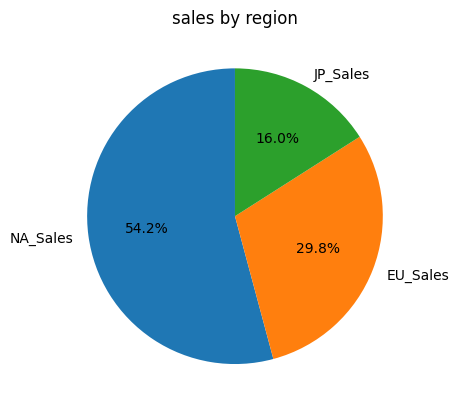

<Figure size 600x600 with 0 Axes>

In [8]:
import seaborn as sns
#sales by region
Region_Sales=df[['NA_Sales','EU_Sales','JP_Sales']].sum()
Region_Sales.plot.pie(autopct='%1.1f%%',startangle=90,title="sales by region")
plt.figure(figsize=(6,6))
plt.show()

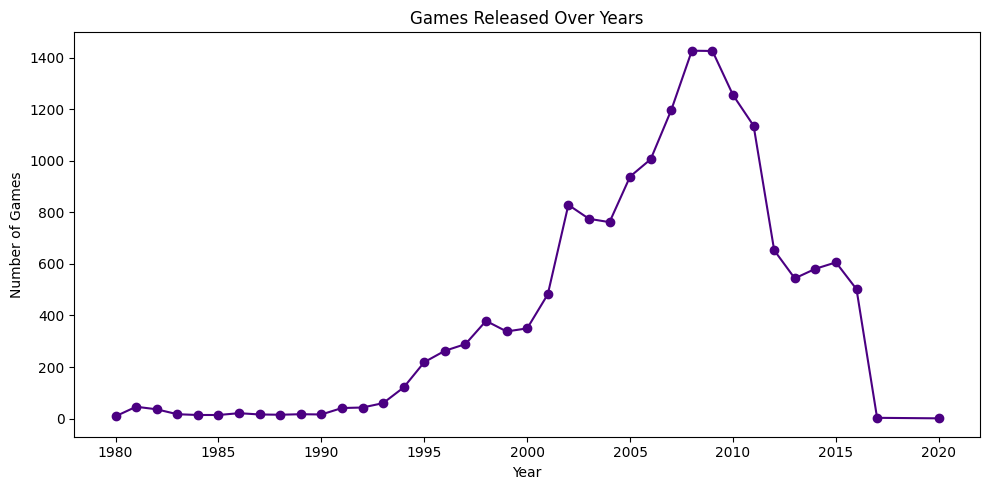

In [9]:
games_per_year = df['Year_of_Release'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
games_per_year.plot(kind='line', marker='o', color='indigo')
plt.title('Games Released Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

In [10]:
df.to_csv('cleaned_vgs.csv')
print("Dataset saved successfully")

Dataset saved successfully
